<a href="https://colab.research.google.com/github/akshin2021/Data-Preprocessing/blob/main/ipl_match_win_prediction_lgbm_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IPL ANALYSIS 2008 - 2020** #

# **Importing required libraries**

In [ ]:
# Importing required libraries
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations
import seaborn as sns  # Library for advanced data visualization
from sklearn.model_selection import train_test_split  # Function to split data into training and testing sets
from sklearn.metrics import confusion_matrix    # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report   # Import the classification_report function for detailed classification metrics
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier model
from sklearn.linear_model import LogisticRegression  # Importing Logistic regression classifier
from sklearn.metrics import accuracy_score  # Function to calculate accuracy score


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Importing our dataset**

In [ ]:
# Reading the CSV file 'ipl.csv' and storing the data in a DataFrame called 'data'
data = pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv')

# Displaying the first 5 rows of the dataset
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


# **Understanding our data**

In [ ]:
# Shape of our data
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (816, 17)


In [ ]:
# 816 rows and 17 columns are present
# Identifying information about composition and potential data quality
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [ ]:
# Get unique values in the 'team1' column
data['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
# Get unique values in the 'team2' column
data['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
# Get unique values in the 'winner' column
data['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
# Get unique values in the 'toss_winner' column
data['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
# Replacing 'Rising Pune Supergiants' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)

# Replacing 'Deccan Chargers' with 'Sunrisers Hyderabad' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.team2.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.toss_winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)

# Replacing 'Delhi Daredevils' with 'Delhi Capitals' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.team2.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.toss_winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)

# Replacing 'Pune Warriors' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)

The above code is used to standardize and clean up the team names in the dataset. There are inconsistencies in the team names, and some teams have multiple variations in their names, such as "Rising Pune Supergiant" as "Rising Pune Supergiants," "Sunrisers Hyderabad" as "Deccan Chargers" and "Delhi Capitals" as "Delhi Daredevils".

By performing these replacements, we ensure that all team names are consistent and represented with the correct name throughout the dataset. This is important because when building models or performing data analysis, having consistent and clean data is crucial for accurate and meaningful results.

# **Checking NULL Values**

In [ ]:
# To count the null values
data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [ ]:
# Fill missing values in 'city' column with 'Unknown'
data['city'].fillna('Unknown', inplace=True)

In [ ]:
# Fill missing values in 'player_of_match', 'result', and 'eliminator' columns with 'Not Available'
cols_to_fill = ['player_of_match', 'result', 'eliminator']
data[cols_to_fill] = data[cols_to_fill].fillna('Not Available')

In [ ]:
# Calculate the mean of the 'result_margin' column
mean_result_margin = data['result_margin'].mean()

# Fill missing values in 'result_margin' column with the mean
data['result_margin'].fillna(mean_result_margin, inplace=True)

In [ ]:
# To drop the unwanted columns
data.drop(['id','method'],axis=1,inplace=True)

In [ ]:
# Drop rows with missing values in the 'winner' column
data.dropna(subset=['winner'], inplace=True)


In [ ]:
# To count the null values
data.isnull().sum()

city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
# Checking the shape of our data after handling null values
data.shape

(812, 15)

In [ ]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract the year from the 'date' column and create a new 'season' column
data['season'] = pd.DatetimeIndex(data['date']).year

In [ ]:
# displaying our data
data.head()

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,season
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008


# **Data Preparation**

In [ ]:
# To display the columns of the data
data.columns

Index(['city', 'date', 'player_of_match', 'venue', 'neutral_venue', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'umpire1', 'umpire2', 'season', 'day',
       'month', 'year'],
      dtype='object')

In [ ]:
## Get the unique venues present in the 'winner' column
data['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Sunrisers Hyderabad', 'Mumbai Indians',
       'Rising Pune Supergiant', 'Kochi Tuskers Kerala', 'Gujarat Lions'],
      dtype=object)

### **Mapping Categorical data into numerical form**
The purpose of this conversion is to transform the categorical data (team names) into numerical form, which is required for many machine learning algorithms that can only handle numerical data. By mapping team names to unique numbers, we can represent them as numerical features in the dataset, enabling us to use them in the model training process.

In [ ]:
# Create a dictionary to map team names to unique numbers
team_mapping = {
    'Kolkata Knight Riders': 1,
    'Chennai Super Kings': 2,
    'Delhi Capitals': 3,
    'Royal Challengers Bangalore': 4,
    'Rajasthan Royals': 5,
    'Kings XI Punjab': 6,
    'Sunrisers Hyderabad': 7,
    'Mumbai Indians': 8,
    'Rising Pune Supergiant': 9,
    'Kochi Tuskers Kerala': 10,
    'Gujarat Lions': 11
}

# Replace team names in 'team1' and 'team2' columns with unique numbers
data['team1'] = data['team1'].map(team_mapping)
data['team2'] = data['team2'].map(team_mapping)

# Replace winner names in 'winner' column with unique numbers
data['winner'] = data['winner'].map(team_mapping)
data['toss_winner'] = data['toss_winner'].map(team_mapping)



We create a dictionary team_mapping where each team name is mapped to a corresponding unique number. Then, we use the map function in Pandas to replace the team names in the 'team1', 'team2', 'winner', and 'toss_winner' columns with their respective unique numerical values.

In [ ]:
# Create a dictionary to map each unique venue name to a unique number
venue_mapping = {venue: i for i, venue in enumerate(data['venue'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['venue'] = data['venue'].map(venue_mapping)

In [ ]:
# Get the unique venues present in the 'toss_decsion' column
data['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [ ]:
# Create a dictionary to map 'toss_decision' values to numerical values
temp = {'field': 0, 'bat': 1}

# Use the map() function to replace 'toss_decision' values with numerical values
data['toss_decision'] = data['toss_decision'].map(temp)

In [ ]:
# Create a set of unique umpires
umpires_set = set(data['umpire1'].unique()).union(set(data['umpire2'].unique()))

# Create a dictionary to map umpire names to unique numbers
umpire_dict = {umpire: i for i, umpire in enumerate(umpires_set, 1)}

# Apply the dictionary to create new encoded columns for 'umpire1' and 'umpire2'
data['umpire1'] = data['umpire1'].map(umpire_dict)
data['umpire2'] = data['umpire2'].map(umpire_dict)


In [ ]:
# Create a dictionary to map each unique venue name to a unique number
player_of_match_mapping = {venue: i for i, venue in enumerate(data['player_of_match'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['player_of_match'] = data['player_of_match'].map(player_of_match_mapping)

In [ ]:
# Create a dictionary to map each unique venue name to a unique number
city_mapping = {venue: i for i, venue in enumerate(data['city'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['city'] = data['city'].map(city_mapping)

In [ ]:
# List of unwanted columns
unwanted_columns = ['date','result','eliminator','season','day','month','year']

# Drop the unwanted columns from the DataFrame
data.drop(columns=unwanted_columns, inplace=True)


In [ ]:
data.head()

,city,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result_margin,umpire1,umpire2
0,0,0,0,0,4,1,4,0,1,140.0,11,41
1,1,1,1,0,6,2,2,1,2,33.0,52,28
2,2,2,2,0,3,5,5,1,3,9.0,18,29
3,3,3,3,0,8,4,8,1,4,5.0,5,13
4,4,4,4,0,1,7,7,1,1,5.0,48,49


# **Splitting our data**

In [ ]:
# Split the data into features (X) and the target variable (y)
X = data.drop(['winner'], axis=1)
y = data['winner']

In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (649, 11)
y_train shape: (649,)
X_test shape: (163, 11)
y_test shape: (163,)


# **Identifying Important features**

In [ ]:
# Create an instance of the RandomForestClassifier with hyperparameters
forest = RandomForestClassifier(n_estimators=500, random_state=1)

# Train the RandomForestClassifier on the training data
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
# Get the feature importances from the trained RandomForestClassifier
importances = forest.feature_importances_

# Loop over each feature and its importance
for i in range(X_train.shape[1]):
    # Print the feature number, name, and importance score
    print("%2d) %-*s %f" % (i + 1, 30, data.columns[i], importances[i]))

 1) city                           0.077567
 2) player_of_match                0.136631
 3) venue                          0.072987
 4) neutral_venue                  0.009789
 5) team1                          0.142738
 6) team2                          0.131298
 7) toss_winner                    0.120104
 8) toss_decision                  0.027014
 9) winner                         0.096080
10) result_margin                  0.093874
11) umpire1                        0.091918


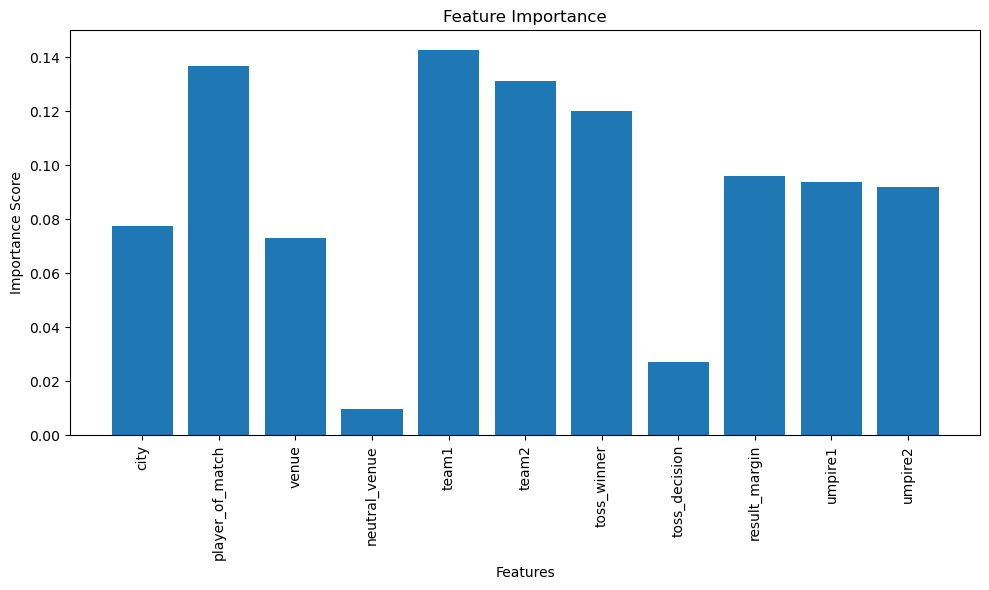

In [ ]:
# Plotting the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.title('Feature Importance')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()


# **Training our Model**

### **1. Logistic Regression**

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2822085889570552


### **2. Random Forest**

In [ ]:
# Initialize the logistic regression model
model = RandomForestClassifier(n_estimators=13)

# Train the model on the training data
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5705521472392638
